In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "./data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 22.5 s, sys: 859 ms, total: 23.4 s
Wall time: 23.4 s


In [2]:
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)
ptRNA_dict, pcodon_dict, codon_dict, codon_labels, pCodon = cognateDistrib(gr25_ptRNA,gr25_pCodon,True)

In [3]:
pCodon_zeros= np.zeros(len(gr25_pCodon))
codon_elongation_latency = list()
for i in range(len(pCodon_zeros)):
    pCodon_zeros= np.zeros(len(gr25_pCodon))
    pCodon_zeros[i] = 1
    codon_elongation_latency.append(computeElongationLatency(gr25_ptRNA,pCodon_zeros,ensmbl_latency_dict)[0][0])
codon_elongt = dict(zip(codon_labels, codon_elongation_latency))

In [11]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np

i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("./data/tables/All_genes_of_E._coli_K-12_substr._MG1655.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    gene_map[seq_record.id] = sequence
print(seq_record)

asnV
ybaE
frwC
fdnH
fmt
yadS
agaC
glcA
ileY
yggI
abgB
frvB
uhpC
valT
yihG
pldB
sgcA
hyfF
proL
yhhI
yqfB
glvC
tap
leuU
yjgM
ynfG
ulaA
mdtC
gltV
yfiB
abgA
agaV
pstA
argZ
yhdV
yibF
yadI
ynjC
asnW
yghT
ynfH
pheP
tyrT
ygeI
ynfE
ynfM
pheU
yphG
ybcF
narI
leuP
yfbP
appA
emtA
glnX
yecH
frc
melB
argW
ydiJ
ynfF
tcyP
ycaM
lysQ
yncJ
yjeH
kdpB
thrV
ycgM
eamB
ybeX
metV
ybjD
satP
glnP
ileU
yahJ
yjbB
mhpT
argQ
dinQ
argO
exbD
valZ
yhiY
yiaO
aqpZ
serX
ynaN
eamA
cyoE
lysW
ynfT
chiA
yqcE
yddG
glyY
yldA
psuG
yfdV
btuC
glnU
ynbG
adeP
ytfT
alaV
ylcI
ghxQ
araJ
valX
ygbE
yagG
yadH
serU
yibN
dmsD
zntA
leuZ
yeiQ
ydcS
fldB
hisQ
glyV
yfiF
pgaD
fre
ccmH
aspT
yhhH
yjbH
norV
actP
cysT
yjgH
pgaC
fdx
yihN
valU
yceD
bcsB
qorA
acrA
proM
yhcF
yjbF
cybB
potI
leuV
yghG
mreC
fldA
yaaJ
gltW
tas
pgaB
hybA
waaL
asnT
yfhR
bcsA
ugpQ
gabP
trhP
yfbL
yjbG
glpK
dcuD
tyrU
yebW
gldA
xanQ
pheV
ydhV
glpQ
cydC
leuQ
mokB
metK
ugpA
gltT
ymgC
talB
hyfC
argX
ybjO
talA
secE
thrW
yahC
speA
wzxC
metY
ypfM
speG
proW
ileV
yqiM
speE
ydhP
glnV
yljB
s

insB1
ssuB
yghW
ymcF
holC
ycjV
insAB1
cysD
yebO
yshB
priC
aaaE
insC5
ynjE
ynaJ
ybdD
mioC
yibS
insD2
yidJ
ybdJ
prkB
hda
sokA
insF2
aslA
yhfG
ppnP
parC
ybfG
insA9
sufD
yidH
yjcF
topB
insEF2
sufA
yfjF
yebE
gyrA
insA7
ydeN
yeaO
ygiF
rep
agrB
insD4
rutF
ymgE
ahr
holD
ralA
insH4
allC
yahL
yjgN
dnaE
C0293
insF1
ygfT
ychJ
yjjA
priA
agrA
insCD5
allA
yedE
yhhW
parE
insA4
glnB
ytfI
yecA
tus
insG
ydfG
yfeS
ibaG
gyrB
insF5
rutB
ydiZ
rhsD
sbcB
b1437
insB4
rutE
yccT
yghR
nfi
b0017
insB3
allD
ykfM
syd
endA
tpke11
insCD2
patA
yehE
yfgI
xseA
yjgW
insK
allB
yciI
arnD
sbcC
b1364
insC3
gltB
yhgF
yoaE
ybhP
sroG
insH3
astC
yfbN
ydiL
sbcD
G0-10704
insH1
cynT
ydgH
yddH
recJ
b3975
insAB5
rutA
ybiU
ycgL
rnt
ycdF
insB6
ptsP
yfiM
ycaR
mcrB
C0664
insA5
rutD
yiiX
ybgI
hsdM
G0-10700
insH2
hcp
ygfB
yaiO
mcrC
ybhU
insA1
allE
yraN
ipeX
hsdR
b3004
insAB4
gltD
yecR
idlP
mrr
b0609
insD5
aegA
ynfB
yoaK
hsdS
tpke70
insC2
glnA
ybeT
opgD
dcm
fruL
insE2
patD
ybcH
yaeH
ogt
b2596
insH21
glnK
yebF
hofB
rarA
b0309
insEF3
rutC
yfaA


In [46]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np

i = 0
gene_map = {}

for seq_record in SeqIO.parse("/Users/akshay/Downloads/sequence.gb", "fasta"):
    sequence = seq_record.gene_synonym
print(sequence)

['AUG', 'AAU', 'UAU', 'CGC', 'UAU', 'CGC', 'GCC', 'AUG', 'ACC', 'CAG', 'GAU', 'GGU', 'CAA', 'AAA', 'UUG', 'CAA', 'GGG', 'AUC', 'AUU', 'GAU', 'GCU', 'AAC', 'GAU', 'GAA', 'CGU', 'CAG', 'GCA', 'CGA', 'CUG', 'CGG', 'CUG', 'CGU', 'GAA', 'GAA', 'GGG', 'CUU', 'UUC', 'CUG', 'CUG', 'GAU', 'AUU', 'CGC', 'CCC', 'CAA', 'AAA', 'AGU', 'UCG', 'GGA', 'GUA', 'AAA', 'ACA', 'CGU', 'CGC', 'CCG', 'AGG', 'AUC', 'AGC', 'CAU', 'AGU', 'GAA', 'CUG', 'ACG', 'CUU', 'UUC', 'ACC', 'CGG', 'CAG', 'UUG', 'GCA', 'ACC', 'UUA', 'AGC', 'GCA', 'GCG', 'GCA', 'UUA', 'CCC', 'CUG', 'GAA', 'GAG', 'AGC', 'CUU', 'GCC', 'GUA', 'AUC', 'GGU', 'CAA', 'CAA', 'AGC', 'AGU', 'AAU', 'AAA', 'CGA', 'CUG', 'GGU', 'GAC', 'GUG', 'UUA', 'AAU', 'CAG', 'GUA', 'CGC', 'AGC', 'GCC', 'AUC', 'CUU', 'GAA', 'GGG', 'CAU', 'CCC', 'CUU', 'UCC', 'GAU', 'GCA', 'UUA', 'CAG', 'CAU', 'UUU', 'CCC', 'ACG', 'CUU', 'UUC', 'GAU', 'UCG', 'CUC', 'UAU', 'CGU', 'ACC', 'CUG', 'GUA', 'AAA', 'GCG', 'GGC', 'GAA', 'AAG', 'AGC', 'GGG', 'CUG', 'CUG', 'GCC', 'CCG', 'GUG', 'UUG'

In [ ]:
#Gene-specific analysis of elongation latency using E. coli genome

In [128]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np


# Go through each gene in the genome and break it down into codons
i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("./data/tables/All_genes_of_E._coli_K-12_substr._MG1655.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    gene_map[seq_record.id] = sequence
print(len(gene_map))

#Create dictionary of gene name and its description, so that we can delete any genes that encode RNA for direct use
#(e.g., tRNA or rRNA) instead of mRNA
gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0
print("Removed ", del_count, " RNA species")
print(len(gene_map))

#Go through each gene and, for each codon in that gene, add its elongation latency and then compute
#the avg elongation latency for the gene. Remove hypothetical genes and other genes with nucleotide lenghts
#that aren't divisible by 3 (typically a predicted or disproven gene)

deleted = list()
gene_latency = {}
for gene in gene_map:
    elongt = 0
    gene_ok = True
    stops = 0
    for codon in gene_map[gene]:
        if codon != "UAA" and codon != "UAG":
            try:
                elongt += codon_elongt[codon]
            except:
                gene_ok = False
        else:
            stops +=1
    if gene_ok:
        elongt = elongt/(len(gene_map[gene])-stops)
        gene_latency[gene] = elongt
    else:
        deleted.append(gene)
for gene in deleted:
    del gene_map[gene]
    
print("Removed ", len(deleted), " non-divisible by three genes")
print(len(gene_latency))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Removed  81  non-divisible by three genes
4277


Text(0, 0.5, 'Probability Density')

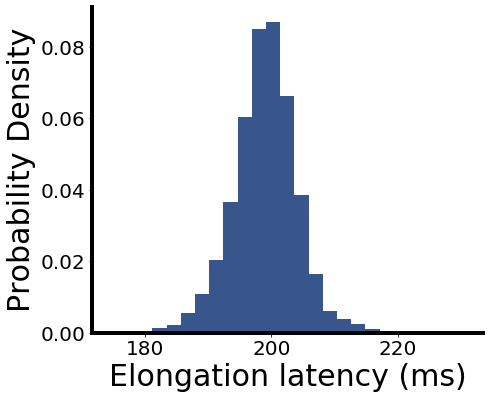

In [8]:
#Plot the elongation latency of each gene
fig,ax = plt.subplots(figsize=(7,6))

hist=ax.hist(gene_latency.values(),color='#39568CFF',bins=25,density=True)


ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=30)
ax.set_ylabel('Probability Density',size=30)

In [9]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np

#Go through each gene and compute the frequency distribution for all possible elongation codons
i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("/Users/akshay/Documents/TranslationDynamics/data/All_genes_of_E._coli_K-12_substr._MG1655-2.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    counter = Counter(sequence)

    pCodon = dict(zip(codon_tags,[0]*len(codon_tags)))
    for key in pCodon:
        pCodon[key] = counter[key]
    pCodon = np.array(list(pCodon.values()))
    gene_map[seq_record.id] = pCodon/sum(pCodon)
print(len(gene_map))

#Delete genes corresponding to RNA
gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0

print("Removed ", del_count, " RNA species")
print(len(gene_map))

/Users/akshay/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


4707
Removed  349  RNA species
4358


NameError: name 'elongt_sorted' is not defined

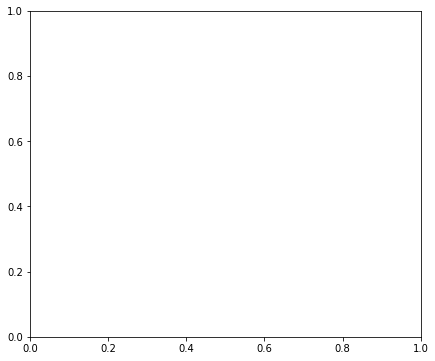

In [10]:
#Plot the frequency of individual codons (computed from all genes in genome) vs. their elongation latency
genome_freq = np.zeros(len(codon_tags))
for i,gene in enumerate(gene_map):
    if not np.isnan(gene_map[gene]).any():
        genome_freq += gene_map[gene]
genome_freq = genome_freq/sum(genome_freq)
genome_pcodon_dict = dict(zip(codon_labels, genome_freq))

pcodon_sorted = sorted(genome_pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codon_sorted = [x[0] for x in pcodon_sorted]
pcodon_sorted = [x[1] for x in pcodon_sorted]

freq_sorted = [codon_elongt[codon] for codon in codon_sorted]

fig,ax = plt.subplots(figsize=(7,6))
ax.scatter(pcodon_sorted,elongt_sorted,color='black',label = 'Protein-coding codon')
ax.set_xlim(0,0.07)

elongt = 0
for i,codon in enumerate(genome_pcodon_dict):
    elongt += genome_pcodon_dict[codon]*codon_elongt[codon]
print('Elongation latency: ', elongt)
ax.set_xlabel('Codon usage frequency',size=25)
ax.set_ylabel('Elongation latency',size=25)

Elongation latency:  188.34648384726196


Text(0, 0.5, 'Elongation latency')

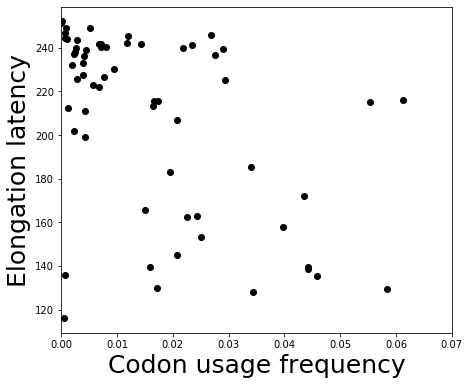

In [11]:
#Plot the frequency of individual codons (based on proteome from Dong et al. data) vs. their elongation latency

#Sort codons by how frequent they are (data from Dong et al.)
pcodon_sorted = sorted(pcodon_dict.items(),key=lambda kv: kv[1])[::-1]
codon_sorted = [x[0] for x in pcodon_sorted]
pcodon_sorted = [x[1] for x in pcodon_sorted]

#Sort the elongation latency for individual codons and plot
elongt_sorted = [codon_elongt[codon] for codon in codon_sorted]

fig,ax = plt.subplots(figsize=(7,6))
ax.scatter(pcodon_sorted,elongt_sorted,color='black',label = 'Protein-coding codon')
ax.set_xlim(0,0.07)

#Average elongation time given the Dong et al. reported codon distribution
elongt = 0
a = dict(zip(codon_sorted, pcodon_sorted))
for i,codon in enumerate(a):
    elongt += a[codon]*codon_elongt[codon]
print('Elongation latency: ', elongt)
ax.set_xlabel('Codon usage frequency',size=25)
ax.set_ylabel('Elongation latency',size=25)

In [12]:
#Compute elongation latencies using transcriptomics data

In [ ]:
transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))

failed_counter = 0
transcriptome_elongt = list()
for key in transcriptome_dict:
    try:
        for i in range(round(transcriptome_dict[key])):
            transcriptome_elongt.append(gene_latency[key])
        if(gene_latency[key]<180):
            print(key)
        #print(gene_latency[key])
    except:
        #print(key)
        failed_counter+=1
print(np.average(transcriptome_elongt))


193.62475779131873


Text(0, 0.5, 'Probability Density')

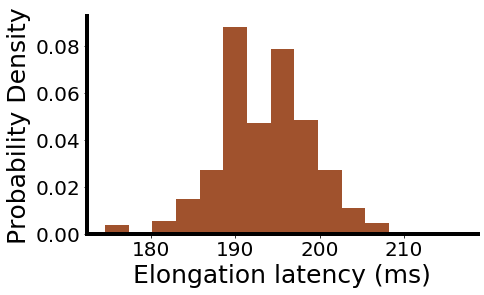

In [14]:
#Plot the elongation latency of each gene
fig,ax = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='sienna',bins=15,density=True)
print(np.average(transcriptome_elongt))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=25)
ax.set_ylabel('Probability Density',size=25)

In [51]:
transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))

failed_counter = 0
for key in transcriptome_dict:
    try:
        a=gene_latency[key]
        #print(gene_latency[key])
    except:
        print(key)
        failed_counter+=1


mogA
yaaH
insL-1
ECB_00020
ECB_00021
ECB_00022
insA-1
insB-1
ECB_00025
ECB_00026
ileS
yabF
ksgA
imp
rluA
hepA
yabJ
tbpA
yabN
fruR
yabB
mraW
ddl
yacA
yacF
lpdA
yadF
yadD
yadB
dksA
ligT
hrpB
yadQ
yadR
yadT
pfs
ispC
yaeL
yaeT
hlpA
tilS
yaeJ
cutF
proS
yaeB
insA-2
insB-2
ECB_00212
ykfE
lpcA
yafK
yafQ
yafM
yafO
ykfJ
yafA
crl
insA-3
insB-3
yagQ
yagR
yagS
yagT
yagV
yagW
yagX
yagY
yagZ
ykgK
ykgB
ykgI
ykgC
ykgD
ECB_00265
yahA
insB-4
insA-4
ECB_00320
yaiV
yaiB
yaiC
yaiE
insB-5
insA-5
yajF
queA
tgt
ybaD
ribH
thiI
thiJ
apbA
ECB_00376
ECB_00377
ECB_00378
insL-2
ybaW
ybaX
ybaO
ylaB
ybaJ
kefA
ybaK
ybaS
ybbK
ybbL
ybbM
ybbN
ybbD
ybbB
ybbS
ybbV
allP
ylbA
arcC
ybbF
cysS
ybcJ
ECB_00487
ECB_00488
ECB_00489
ECB_00490
rus
ybcQ
insB-6
insA-6
ybcR
ybcS
ybcT
ybcU
ECB_00510
nohB
ECB_00512
ECB_00513
ECB_00514
ECB_00515
ECB_00516
ECB_00517
ECB_00524
ECB_00526
ECB_00527
ECB_00528
ECB_00529
ECB_00530
ylcC
nfnB
insJ-1
insB-7
insA-7
insL-3
ybdA
ybdB
ybdH
insB-8
insA-8
ybdQ
insB-9
insA-9
citA
citB
crcA
cspE
ccrB
ybeM
yb

In [50]:
print(gene_latency)

{'ybaE': 205.08850587327223, 'frwC': 190.537754980875, 'fdnH': 196.44409942047145, 'yadS': 195.0963040439431, 'agaC': 200.92915491803353, 'glcA': 199.72911520188688, 'yggI': 197.86648960923748, 'abgB': 201.38948017656173, 'frvB': 198.0056331567536, 'uhpC': 200.93641681643973, 'yihG': 205.89576336504882, 'pldB': 196.1951971631241, 'sgcA': 204.56244042730214, 'hyfF': 203.4358384360599, 'yhhI': 197.90800272093017, 'yqfB': 196.0497219522021, 'glvC': 200.06851289544053, 'tap': 197.54459075914642, 'yjgM': 194.72691003990153, 'ynfG': 198.4196257798939, 'ulaA': 196.41476500990206, 'mdtC': 199.47531638343284, 'yfiB': 205.7069788239778, 'abgA': 197.3405581283043, 'agaV': 196.81769661377092, 'pstA': 194.53177050266493, 'yhdV': 196.76748902171497, 'yibF': 195.12848957343797, 'yadI': 200.77340952458886, 'ynjC': 205.06361617909508, 'yghT': 197.8657209584851, 'ynfH': 200.79423379965212, 'pheP': 196.4708643908972, 'ygeI': 201.3224709993791, 'ynfE': 196.85481650307986, 'ynfM': 206.00051591008537, 'yphG

In [290]:
print(list(gene_type['AllGenes']))

["3'ETS-<i>leuZ</i>", 'aaaD', 'aaaE', 'aaeA', 'aaeB', 'aaeR', 'aaeX', 'aas', 'aat', 'abgA', 'abgB', 'abgR', 'abgT', 'abpA', 'abpB', 'abrB', 'accA', 'accB', 'accC', 'accD', 'aceA', 'aceB', 'aceE', 'aceF', 'aceK', 'ackA', 'ackB', 'acnA', 'acnB', 'acpH', 'acpP', 'acpS', 'acpT', 'acrA', 'acrB', 'acrD', 'acrE', 'acrF', 'acrR', 'acrZ', 'acs', 'actP', 'ada', 'add', 'adeD', 'adeP', 'adeQ', 'adhE', 'adhP', 'adiA', 'adiC', 'adiY', 'adk', 'aegA', 'aer', 'aes', 'afuB', 'afuC', 'agaA', 'agaB', 'agaC', 'agaD', 'agaI', 'agaR', 'agaS', 'agaV', 'agaW', 'agp', 'agrA', 'agrB', 'ahpC', 'ahpF', 'ahr', 'aidB', 'ais', 'alaA', 'alaB', 'alaC', 'alaE', 'alaS', 'alaT', 'alaU', 'alaV', 'alaW', 'alaX', 'aldA', 'aldB', 'alkA', 'alkB', 'allA', 'allB', 'allC', 'allD', 'allE', 'allR', 'allS', 'alpA', 'alr', 'alsA', 'alsB', 'alsC', 'alsE', 'alsK', 'alsR', 'alx', 'amiA', 'amiB', 'amiC', 'amiD', 'amn', 'ampC', 'ampD', 'ampE', 'ampG', 'ampH', 'amtB', 'amyA', 'anmK', 'ansA', 'ansB', 'ansP', 'apaG', 'apaH', 'aphA', 'appA', 

In [61]:
genes = pd.read_csv('/Users/akshay/Downloads/gene_result.txt',delimiter='\t')
genes = genes[['Symbol','Aliases']]

genes_dict = dict(zip(genes['']))

,Symbol,Aliases
0,recA,"b2699, ECK2694, lexB, recH, rnmB, srf, tif, um..."
1,dnaA,"b3702, ECK3694"
2,crp,"b3357, ECK3345, cap, csm, gurB"
3,ftsZ,"b0095, ECK0096, sfiB, sulB"
4,rpoS,"b2741, ECK2736, abrD, appR, csi2, dpeB, katF, ..."
...,...,...
4395,CAOG_03620,CAOG_03620
4396,EIN_271030,EIN_271030
4397,PTRG_07000,PTRG_07000
4398,SS1G_07263,SS1G_07263


In [70]:
np.char.split(genes['Aliases'][0], sep=',')

array(list(['b2699', ' ECK2694', ' lexB', ' recH', ' rnmB', ' srf', ' tif', ' umuB', ' zab']),
      dtype=object)

In [129]:
genes1 = pd.read_csv('/Users/akshay/Downloads/All_proteins_\(polypeptides_+_protein_complexes\)_of_E._coli_K-12_substr._MG1655.txt',delimiter='\t')
for i,name in genes1.iterrows():
    try:
        gene_names = np.char.split(name['Names'], sep='//')
        np.append(gene_names,name['Common-Name'])
    except:
        gene_names = name['Common-Name']
    print(gene_names)
print(name['Names'])
print(name['Sequence - sequence of DNA region'])

["3'ETS-<i>leuZ</i> ", ' b4759 ', ' ECK4616']
['aaaD ', ' ylcF ', ' b4634 ', ' ECK4439']
['aaaE ', ' b4693 ', ' ECK1135']
['aaeA ', ' yhcQ ', ' b3241 ', ' ECK3230']
['aaeB ', ' yhcP ', ' b3240 ', ' ECK3229']
['aaeR ', ' yhcS ', ' qseA ', ' b3243 ', ' ECK3232']
['aaeX ', ' yhcR ', ' b3242 ', ' ECK3231']
['aas ', ' b2836 ', ' ECK2832']
['aat ', ' ycaA ', ' b0885 ', ' ECK0876']
['abgA ', ' ydaJ ', ' b1338 ', ' ECK1334']
['abgB ', ' ydaI ', ' b1337 ', ' ECK1333']
['abgR ', ' b1339 ', ' ECK1335']
['abgT ', ' ydaH ', ' b1336 ', ' ECK1332']
['abpA ', ' yfjL ', ' b2628 ', ' ECK2624']
['abpB ', ' yfjK ', ' b2627 ', ' ECK2623']
['abrB ', ' ybgN ', ' b0715 ', ' ECK0704']
['accA ', ' b0185 ', ' ECK0184']
['accB ', ' fabE ', ' b3255 ', ' ECK3242']
['accC ', ' fabG ', ' b3256 ', ' ECK3243']
['accD ', ' dedB ', ' usg ', ' b2316 ', ' ECK2310']
['aceA ', ' icl ', ' b4015 ', ' ECK4007']
['aceB ', ' mas ', ' b4014 ', ' ECK4006']
['aceE ', ' b0114 ', ' ECK0113']
['aceF ', ' b0115 ', ' ECK0114']
['aceK ', 

['glnA ', ' b3870 ', ' ECK3863']
['glnB ', ' b2553 ', ' ECK2550']
['glnD ', ' glnD5 ', ' b0167 ', ' ECK0165']
['glnE ', ' b3053 ', ' ECK3043']
['glnG ', ' glnT ', ' ntrC ', ' b3868 ', ' ECK3861']
['glnH ', ' b0811 ', ' ECK0800']
['glnK ', ' ybaI ', ' b0450 ', ' ECK0444']
['glnL ', ' glnR ', ' ntrB ', ' b3869 ', ' ECK3862']
['glnP ', ' b0810 ', ' ECK0799']
['glnQ ', ' b0809 ', ' ECK0798']
['glnS ', ' b0680 ', ' ECK0668']
['glnU ', ' glnUalpha ', ' supB ', ' trnA ', ' b0670 ', ' ECK0659']
['glnV ', ' Su2 ', ' glnValpha ', ' suII ', ' supE ', ' b0665 ', ' ECK0656']
['glnW ', ' glnU-beta ', ' glnUbeta ', ' b0668 ', ' ECK0658']
['glnX ', ' supE ', ' glnV-beta ', ' glnVbeta ', ' b0664 ', ' ECK0655']
['gloA ', ' b1651 ', ' ECK1647']
['gloB ', ' yafR ', ' b0212 ', ' ECK0212']
['gloC ', ' ycbL ', ' b0927 ', ' ECK0918']
['glpA ', ' b2241 ', ' ECK2233']
['glpB ', ' psi-51 ', ' b2242 ', ' ECK2234']
['glpC ', ' b2243 ', ' ECK2235']
['glpD ', ' glyD ', ' b3426 ', ' ECK3412']
['glpE ', ' b3425 ', ' E

['mdtM ', ' yjiO ', ' b4337 ', ' ECK4328']
['mdtN ', ' yjcR ', ' sdsR ', ' b4082 ', ' ECK4075']
['mdtO ', ' yjcQ ', ' sdsQ ', ' b4081 ', ' ECK4074']
['mdtP ', ' yjcP ', ' sdsP ', ' b4080 ', ' ECK4073']
['mdtQ ', ' yohH ', ' yohG ', ' b2138 ', ' ECK2132 ', ' b2139 ', ' ECK2131']
['melA ', ' mel-7 ', ' b4119 ', ' ECK4112']
['melB ', ' mel-4 ', ' b4120 ', ' ECK4113']
['melR ', ' b4118 ', ' ECK4111']
['menA ', ' yiiW ', ' b3930 ', ' ECK3922']
['menB ', ' b2262 ', ' ECK2256']
['menC ', ' b2261 ', ' ECK2255']
['menD ', ' b2264 ', ' ECK2258']
['menE ', ' b2260 ', ' ECK2254']
['menF ', ' yfbA ', ' b2265 ', ' ECK2259']
['menH ', ' yfbB ', ' b2263 ', ' ECK2257']
['menI ', ' ydiI ', ' b1686 ', ' ECK1683']
['mepA ', ' b2328 ', ' ECK2322']
['mepH ', ' ydhO ', ' b1655 ', ' ECK1651']
['mepK ', ' ycbK ', ' b0926 ', ' ECK0917']
['mepM ', ' yebA ', ' b1856 ', ' ECK1857']
['mepS ', ' yeiV ', ' spr ', ' b2175 ', ' ECK2169']
['metA ', ' b4013 ', ' ECK4005']
['metB ', ' met-1 ', ' b3939 ', ' ECK3931']
['met

['rplP ', ' b3313 ', ' ECK3300']
['rplQ ', ' b3294 ', ' ECK3281']
['rplR ', ' b3304 ', ' ECK3291']
['rplS ', ' b2606 ', ' ECK2603']
['rplT ', ' pdzA ', ' b1716 ', ' ECK1714']
['rplU ', ' b3186 ', ' ECK3175']
['rplV ', ' eryB ', ' b3315 ', ' ECK3302']
['rplW ', ' b3318 ', ' ECK3305']
['rplX ', ' b3309 ', ' ECK3296']
['rplY ', ' b2185 ', ' ECK2179']
['rpmA ', ' rpz ', ' b3185 ', ' ECK3174']
['rpmB ', ' b3637 ', ' ECK3627']
['rpmC ', ' b3312 ', ' ECK3299']
['rpmD ', ' b3302 ', ' ECK3289']
['rpmE ', ' b3936 ', ' ECK3928']
['rpmF ', ' b1089 ', ' ECK1075']
['rpmG ', ' b3636 ', ' ECK3626']
['rpmH ', ' rimA ', ' ssaF ', ' b3703 ', ' ECK3695']
['rpmI ', ' b1717 ', ' ECK1715']
['rpmJ ', ' secX ', ' b3299 ', ' ECK3286']
['rpnA ', ' yhgA ', ' b3411 ', ' ECK3398']
['rpnB ', ' yfcI ', ' b2305 ', ' ECK2299']
['rpnC ', ' yadD ', ' b0132 ', ' ECK0131']
['rpnD ', ' yjiP ', ' b4338 ', ' ECK4330 ', ' yjiQ ', ' b4339 ', ' b4584 ', ' ECK4329']
['rpnE ', ' yfaD ', ' b2244 ', ' ECK2236']
['rpoA ', ' pez ', ' 

['xynR ', ' yagI ', ' b0272 ', ' ECK0273']
['yaaA ', ' b0006 ', ' ECK0006']
['yaaI ', ' b0013 ', ' ECK0013']
['yaaJ ', ' b0007 ', ' ECK0007']
['yaaU ', ' yabE ', ' b0045 ', ' ECK0046']
['yaaW ', ' b0011 ', ' ECK0011']
['yaaX ', ' b0005 ', ' ECK0005']
['yaaY ', ' b0024 ', ' ECK0025']
['yabI ', ' b0065 ', ' ECK0066']
['yabP ', ' b4659 ', ' b0056 ', ' ECK0057']
['yabQ ', ' b4659 ', ' b0057 ', ' ECK0058']
['yabR ', ' b4726 ', ' ECK4583']
['yacC ', ' b0122 ', ' ECK0121']
['yacG ', ' b0101 ', ' ECK0101']
['yacH ', ' b0117 ', ' ECK0116']
['yacL ', ' b0119 ', ' ECK0118']
['yacM ', ' b4727 ', ' ECK4584']
['yadC ', ' b0135 ', ' ECK0134']
['yadE ', ' b0130 ', ' ECK0129']
['yadG ', ' b0127 ', ' ECK0126']
['yadH ', ' b0128 ', ' ECK0127']
['yadI ', ' agaX ', ' b0129 ', ' ECK0128']
['yadK ', ' b0136 ', ' ECK0135']
['yadL ', ' b0137 ', ' ECK0136']
['yadM ', ' b0138 ', ' ECK0137']
['yadN ', ' b0141 ', ' ECK0140']
['yadS ', ' b0157 ', ' ECK0156']
['yadV ', ' ecpD ', ' b0140 ', ' ECK0139']
['yadW ', ' b4

['yhbW ', ' b3160 ', ' ECK3148']
['yhbX ', ' b3173 ', ' ECK3162']
['yhbY ', ' b3180 ', ' ECK3169']
['yhcA ', ' b3215 ', ' ECK3205']
['yhcB ', ' b3233 ', ' ECK3222']
['yhcC ', ' b3211 ', ' ECK3201']
['yhcD ', ' b3216 ', ' ECK3206']
['yhcE ', ' b3217 ', ' b4549 ', ' b4569 ', ' ECK3207']
['yhcF ', ' b3219 ', ' ECK3208']
['yhcG ', ' b3220 ', ' ECK3209']
['yhcH ', ' b3221 ', ' ECK3210']
['yhcN ', ' b3238 ', ' ECK3227']
['yhcO ', ' b3239 ', ' ECK3228']
['yhdE ', ' b3248 ', ' ECK3236']
['yhdH ', ' acuI ', ' b3253 ', ' ECK3241']
['yhdJ ', ' ccrM ', ' b3262 ', ' ECK3249']
['yhdN ', ' b3293 ', ' ECK3280']
['yhdP ', ' b3246 ', ' yhdR ', ' yhdQ ', ' b3245 ', ' b4472 ', ' ECK3234']
['yhdT ', ' b3257 ', ' ECK3244']
['yhdU ', ' b3263 ', ' ECK3250']
['yhdV ', ' b3267 ', ' ECK3254']
['yhdW ', ' b3268 ', ' ECK3255']
['yhdX ', ' b3269 ', ' ECK3256']
['yhdY ', ' b3270 ', ' ECK3257']
['yhdZ ', ' b3271 ', ' ECK3258']
['yheO ', ' b3346 ', ' ECK3333']
['yheS ', ' b3352 ', ' ECK3340']
['yheT ', ' b3353 ', ' EC

In [236]:
genes2 = pd.read_csv('/Users/akshay/Downloads/Gene_Name_from_Copy_of_All_genes_of_E._coli_K-12_substr._MG1655.txt',delimiter='\t')
gene_dict = {}
for i,name in genes2.iterrows():
    try:
        gene_names = np.char.split(name['Names'], sep='//')
        for gene in gene_names:
            gene_dict[gene] = name['Sequence - sequence of DNA region']
    except:
        print('no name')
    print(gene_names)

no name
["3'ETS-<i>leuZ</i> ", ' b4759 ', ' ECK4616']
no name
['aaaD ', ' ylcF ', ' b4634 ', ' ECK4439']
no name
['aaaE ', ' b4693 ', ' ECK1135']
no name
['aaeA ', ' yhcQ ', ' b3241 ', ' ECK3230']
no name
['aaeB ', ' yhcP ', ' b3240 ', ' ECK3229']
no name
['aaeR ', ' yhcS ', ' qseA ', ' b3243 ', ' ECK3232']
no name
['aaeX ', ' yhcR ', ' b3242 ', ' ECK3231']
no name
['aas ', ' b2836 ', ' ECK2832']
no name
['aat ', ' ycaA ', ' b0885 ', ' ECK0876']
no name
['abgA ', ' ydaJ ', ' b1338 ', ' ECK1334']
no name
['abgB ', ' ydaI ', ' b1337 ', ' ECK1333']
no name
['abgR ', ' b1339 ', ' ECK1335']
no name
['abgT ', ' ydaH ', ' b1336 ', ' ECK1332']
no name
['abpA ', ' yfjL ', ' b2628 ', ' ECK2624']
no name
['abpB ', ' yfjK ', ' b2627 ', ' ECK2623']
no name
['abrB ', ' ybgN ', ' b0715 ', ' ECK0704']
no name
['accA ', ' b0185 ', ' ECK0184']
no name
['accB ', ' fabE ', ' b3255 ', ' ECK3242']
no name
['accC ', ' fabG ', ' b3256 ', ' ECK3243']
no name
['accD ', ' dedB ', ' usg ', ' b2316 ', ' ECK2310']


no name
['dinF ', ' b4044 ', ' ECK4036']
no name
['dinG ', ' rarB ', ' b0799 ', ' ECK0788']
no name
['dinI ', ' b1061 ', ' ECK1046']
no name
['dinJ ', ' sosA ', ' b0226 ', ' ECK0227']
no name
['dinQ ', ' b4613 ', ' ECK4422']
no name
['djlA ', ' yabH ', ' b0055 ', ' ECK0056']
no name
['djlB ', ' ybeS ', ' b0646 ', ' ECK0639']
no name
['djlC ', ' hscD ', ' ybeV ', ' hsc56 ', ' b0649 ', ' ECK0642']
no name
['dkgA ', ' yqhE ', ' b3012 ', ' ECK3004']
no name
['dkgB ', ' yafB ', ' b0207 ', ' ECK0207']
no name
['dksA ', ' msmA ', ' b0145 ', ' ECK0144']
no name
['dld ', ' ldh ', ' b2133 ', ' ECK2126']
no name
['dmlA ', ' ttuC ', ' yeaU ', ' b1800 ', ' ECK1798']
no name
['dmlR ', ' yeaT ', ' b1799 ', ' ECK1797']
no name
['dmsA ', ' b0894 ', ' ECK0885']
no name
['dmsB ', ' b0895 ', ' ECK0886']
no name
['dmsC ', ' b0896 ', ' ECK0887']
no name
['dmsD ', ' ynfI ', ' b1591 ', ' ECK1586']
no name
['dnaA ', ' b3702 ', ' ECK3694']
no name
['dnaB ', ' groP ', ' grpA ', ' grpD ', ' b4052 ', ' ECK4044']
n

no name
['gltS ', ' gltC ', ' b3653 ', ' ECK3643']
no name
['gltT ', ' tgtB ', ' b3969 ', ' ECK3961']
no name
['gltU ', ' tgtC ', ' b3757 ', ' ECK3751']
no name
['gltV ', ' tgtE ', ' b4008 ', ' ECK4000']
no name
['gltW ', ' b2590 ', ' ECK2588']
no name
['gltX ', ' gltM ', ' gluRS ', ' b2400 ', ' ECK2394']
no name
['gluQ ', ' yadB ', ' b0144 ', ' ECK0143']
no name
['glvB ', ' yidN ', ' yidO ', ' b3682 ', ' ECK3674']
no name
['glvC ', ' ptiC ', ' b3683 ', ' ECK3675']
no name
['glvG ', ' yidM ', ' b3681 ', ' ECK3673']
no name
['glxK ', ' glxB5 ', ' ybbZ ', ' b0514 ', ' ECK0507']
no name
['glxR ', ' glxB1 ', ' ybbQ ', ' b0509 ', ' ECK0502']
no name
['glyA ', ' b2551 ', ' ECK2548']
no name
['glyQ ', ' cfcA ', ' glyS(A) ', ' b3560 ', ' ECK3548']
no name
['glyS ', ' glyS(B) ', ' gly ', ' gly-act ', ' b3559 ', ' ECK3547']
no name
['glyT ', ' sumA ', ' sup15B ', ' supA36 ', ' b3978 ', ' ECK3969']
no name
['glyU ', ' supT ', ' suA36 ', ' sufD ', ' sumA ', ' sumB ', ' b2864 ', ' ECK2860']
no name

no name
['lolA ', ' yzzV ', ' lplA ', ' b0891 ', ' ECK0882']
no name
['lolB ', ' hemM ', ' ychC ', ' b1209 ', ' ECK1197']
no name
['lolC ', ' ycfU ', ' b1116 ', ' ECK1102']
no name
['lolD ', ' ycfV ', ' b1117 ', ' ECK1103']
no name
['lolE ', ' ycfW ', ' b1118 ', ' ECK1104']
no name
['lomR ', ' b1369 ', ' b1371 ', ' b4570 ', ' ECK1366']
no name
['lon ', ' capR ', ' deg ', ' dir ', ' lopA ', ' muc ', ' b0439 ', ' ECK0433']
no name
['lpd ', ' dhl ', ' lpdA ', ' b0116 ', ' ECK0115']
no name
['lplA ', ' yjjF ', ' slr ', ' b4386 ', ' ECK4378']
no name
['lplT ', ' ygeD ', ' b2835 ', ' ECK2831']
no name
['lpoA ', ' yraM ', ' b3147 ', ' ECK3135']
no name
['lpoB ', ' ycfM ', ' b1105 ', ' ECK1091']
no name
['lpp ', ' mlpA ', ' b1677 ', ' ECK1673']
no name
['lptA ', ' yhbN ', ' b3200 ', ' ECK3189']
no name
['lptB ', ' yhbG ', ' b3201 ', ' ECK3190']
no name
['lptC ', ' yrbK ', ' b3199 ', ' ECK3188']
no name
['lptD ', ' yabG ', ' ostA ', ' imp ', ' b0054 ', ' ECK0055']
no name
['lptE ', ' rlpB ', ' 

no name
['pflA ', ' act ', ' b0902 ', ' ECK0893']
no name
['pflB ', ' pfl ', ' b0903 ', ' ECK0894']
no name
['pflC ', ' yijM ', ' b3952 ', ' ECK3943']
no name
['pflD ', ' yijL ', ' b3951 ', ' ECK3942']
no name
['pgaA ', ' hmsH ', ' ycdS ', ' b1024 ', ' ECK1014']
no name
['pgaB ', ' hmsF ', ' ycdR ', ' b1023 ', ' ECK1013']
no name
['pgaC ', ' hmsR ', ' ycdQ ', ' b1022 ', ' ECK1012']
no name
['pgaD ', ' hmsS ', ' ycdP ', ' b1021 ', ' ECK1011']
no name
['pgeF ', ' yfiH ', ' b2593 ', ' ECK2591']
no name
['pgi ', ' b4025 ', ' ECK4017']
no name
['pgk ', ' b2926 ', ' ECK2922']
no name
['pgl ', ' ybhE ', ' b0767 ', ' ECK0756']
no name
['pgm ', ' blu ', ' b0688 ', ' ECK0676']
no name
['pgpA ', ' yajN ', ' b0418 ', ' ECK0412']
no name
['pgpB ', ' b1278 ', ' ECK1273']
no name
['pgpC ', ' yfhB ', ' b2560 ', ' ECK2558']
no name
['pgrR ', ' ycjZ ', ' b1328 ', ' ECK1325']
no name
['pgsA ', ' b1912 ', ' ECK1911']
no name
['pheA ', ' b2599 ', ' ECK2596']
no name
['pheL ', ' pheAE ', ' b2598 ', ' ECK259

no name
['sapD ', ' trkE ', ' b1291 ', ' ECK1286']
no name
['sapF ', ' b1290 ', ' ECK1285']
no name
['satP ', ' yaaH ', ' b0010 ', ' ECK0010']
no name
['sbcB ', ' exoI ', ' rmuA ', ' cpeA ', ' xonA ', ' b2011 ', ' ECK2005']
no name
['sbcC ', ' b0397 ', ' ECK0391']
no name
['sbcD ', ' yajA ', ' b0398 ', ' ECK0392']
no name
['sbmA ', ' b0377 ', ' ECK0372']
no name
['sbmC ', ' dgi ', ' gyrI ', ' yeeB ', ' b2009 ', ' ECK2003']
no name
['sbp ', ' b3917 ', ' ECK3909']
no name
['scpA ', ' yliK ', ' sbm ', ' b2917 ', ' ECK2913']
no name
['scpB ', ' ygfG ', ' b2919 ', ' ECK2915']
no name
['scpC ', ' ygfH ', ' b2920 ', ' ECK2916']
no name
['sdaA ', ' b1814 ', ' ECK1812']
no name
['sdaB ', ' b2797 ', ' ECK2792']
no name
['sdaC ', ' dcrA ', ' b2796 ', ' ECK2791']
no name
['sdhA ', ' dhsA ', ' b0723 ', ' ECK0712']
no name
['sdhB ', ' dhsB ', ' b0724 ', ' ECK0713']
no name
['sdhC ', ' cybL ', ' cybA ', ' dhsC ', ' b0721 ', ' ECK0710']
no name
['sdhD ', ' cybS ', ' dhsD ', ' b0722 ', ' ECK0711']
no n

no name
['yadM ', ' b0138 ', ' ECK0137']
no name
['yadN ', ' b0141 ', ' ECK0140']
no name
['yadS ', ' b0157 ', ' ECK0156']
no name
['yadV ', ' ecpD ', ' b0140 ', ' ECK0139']
no name
['yadW ', ' b4728 ', ' ECK4585']
no name
['yadX ', ' b4765 ', ' ECK4622']
no name
['yaeF ', ' yaeK ', ' b0193 ', ' ECK0193']
no name
['yaeH ', ' b0163 ', ' ECK0162']
no name
['yaeI ', ' b0164 ', ' ECK0163']
no name
['yaeP ', ' b4406 ', ' ECK0189']
no name
['yaeQ ', ' b0190 ', ' ECK0190']
no name
['yaeR ', ' b0187 ', ' ECK0186']
no name
['yafC ', ' b0208 ', ' ECK0208']
no name
['yafD ', ' b0209 ', ' ECK0209']
no name
['yafE ', ' b0210 ', ' ECK0210']
no name
['yafF ', ' b4503 ', ' ECK0219']
no name
['yafJ ', ' b0223 ', ' ECK0224']
no name
['yafL ', ' b0227 ', ' ECK0228']
no name
['yafN ', ' b0232 ', ' ECK0233']
no name
['yafO ', ' b0233 ', ' ECK0234']
no name
['yafP ', ' b0234 ', ' ECK0235']
no name
['yafQ ', ' b0225 ', ' ECK0226']
no name
['yafS ', ' b0213 ', ' ECK0213']
no name
['yafT ', ' b0217 ', ' ECK021

no name
['yeiW ', ' b4502 ', ' ECK2164']
no name
['yejA ', ' b2177 ', ' ECK2171']
no name
['yejB ', ' b2178 ', ' ECK2172']
no name
['yejE ', ' b2179 ', ' ECK2173']
no name
['yejF ', ' b2180 ', ' ECK2174']
no name
['yejG ', ' b2181 ', ' ECK2175']
no name
['yejK ', ' ndpA ', ' b2186 ', ' ECK2180']
no name
['yejL ', ' b2187 ', ' ECK2181']
no name
['yejM ', ' yejN ', ' pbgA ', ' b2188 ', ' ECK2182']
no name
['yejO ', ' b2190 ', ' ECK2184']
no name
['yfaA ', ' pufY ', ' b2230 ', ' ECK2222']
no name
['yfaE ', ' b2236 ', ' ECK2228']
no name
['yfaH ', ' b2238 ', ' ECK2230']
no name
['yfaL ', ' yfaF ', ' yfaK ', ' yfaJ ', ' b2233 ', ' ECK2225']
no name
['yfaP ', ' b2225 ', ' ECK2218']
no name
['yfaQ ', ' b2226 ', ' ECK2219']
no name
['yfaS ', ' yfaR ', ' b2228 ', ' b2227 ', ' b4500 ', ' ECK2220']
no name
['yfaT ', ' b2229 ', ' ECK2221']
no name
['yfaU ', ' b2245 ', ' ECK2238']
no name
['yfaV ', ' b2246 ', ' ECK2239']
no name
['yfaX ', ' b2248 ', ' ECK2241']
no name
['yfaY ', ' b2249 ', ' ECK224

['yjiN ', ' b4336 ', ' ECK4327']
no name
['yjiR ', ' b4340 ', ' ECK4331']
no name
['yjiS ', ' b4341 ', ' ECK4332']
no name
['yjiT ', ' b4342 ', ' ECK4333']
no name
['yjiV ', ' mcrD ', ' yjiU ', ' b4343 ', ' b4344 ', ' b4486 ', ' ECK4334']
no name
['yjiX ', ' b4353 ', ' ECK4343']
no name
['yjjA ', ' b4360 ', ' ECK4350']
no name
['yjjB ', ' b4363 ', ' ECK4353']
no name
['yjjG ', ' b4374 ', ' ECK4365']
no name
['yjjI ', ' yjjH ', ' b4380 ', ' ECK4372']
no name
['yjjJ ', ' b4385 ', ' ECK4377']
no name
['yjjP ', ' b4364 ', ' ECK4354']
no name
['yjjQ ', ' b4365 ', ' ECK4355']
no name
['yjjU ', ' b4377 ', ' ECK4369']
no name
['yjjV ', ' b4378 ', ' ECK4370']
no name
['yjjW ', ' b4379 ', ' ECK4371']
no name
['yjjX ', ' b4394 ', ' ECK4386']
no name
['yjjY ', ' b4402 ', ' ECK4394']
no name
['yjjZ ', ' b4567 ', ' ECK4358']
no name
['yjtD ', ' lasT ', ' b4403 ', ' ECK4395']
no name
['ykfA ', ' b0253 ', ' ECK0255']
no name
['ykfB ', ' b0250 ', ' ECK0252']
no name
['ykfC ', ' b0258 ', ' ECK0260']
no 

In [237]:
genes2 = pd.read_csv('/Users/akshay/Downloads/__All_polypeptides_of_E._coli_K-12_substr._MG1655.txt',delimiter='\t')
genes2 = genes2[genes2['Names'].notnull()]
gene_dict = {}
for i,name in genes2.iterrows():
    gene_names = name['Names'].split(sep=' // ')
    for gene in gene_names:
        sequence = str(name['Sequence - DNA sequence']).replace('T','U')
        sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
        gene_dict[gene] = sequence
        
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')

transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['gene_name'],transcriptome['baseMean']))

for gene in transcriptome_dict:
    try:
        gene_dict[gene]
    except:
        failed_counter+=1
        print(gene)
print('Missing genes in transcriptome_dict in compute_transcript_distributions: ', failed_counter)

insL-1
ECB_00020
ECB_00021
ECB_00022
insA-1
insB-1
ECB_00025
ECB_00026
insA-2
insB-2
ECB_00212
ykfJ
prfH
crl
insA-3
insB-3
eaeH
ykgA
ECB_00265
insB-4
insA-4
ECB_00320
yaiT
ykiA
insB-5
insA-5
ECB_00376
ECB_00377
ECB_00378
insL-2
ylbH
ybbD
ybbV
ECB_00487
ECB_00488
ECB_00489
ECB_00490
renD
insB-6
insA-6
ECB_00510
ECB_00512
ECB_00513
ECB_00514
ECB_00515
ECB_00516
ECB_00517
ECB_00524
ECB_00526
ECB_00527
ECB_00528
ECB_00529
ECB_00530
insJ-1
insB-7
insA-7
insL-3
insB-8
insA-8
insB-9
insA-9
ccrB
ybeM
insJ-2
insK-2
ECB_00624
ybfGH
ECB_00650
ybfO
ECB_00662
ECB_00663
ECB_00664
ECB_00726
ECB_00727
ECB_00728
ECB_00729
ECB_00730
ECB_00731
ECB_00732
ECB_00733
ECB_00734
ECB_00735
ECB_00736
ECB_00737
ECB_00738
ECB_00739
ECB_00783
ECB_00814
ECB_00815
ECB_00816
ECB_00817
ECB_00818
ECB_00819
ECB_00820
ECB_00821
ECB_00822
ECB_00823
ECB_00824
ECB_00825
ECB_00826
ECB_00827
ECB_00828
ECB_00829
nan
ECB_00831
ECB_00832
ECB_00833
ECB_00834
ECB_00835
ECB_00836
ECB_00837
ECB_00838
ECB_00839
ECB_00840
ECB_00841
ECB

In [222]:
gene_dict.keys()

dict_keys(['iscX', 'yfhJ', 'b2524', 'ECK2521', 'yicL', 'b3660', 'ECK3650', 'yihN', 'b3874', 'ECK3867', 'metF', 'b3941', 'ECK3933', 'thiH', 'thiB', 'b3990', 'ECK3981', 'dxs', 'yajP', 'b0420', 'ECK0414', 'cueO', 'yacK', 'b0123', 'ECK0122', 'lolB', 'hemM', 'ychC', 'b1209', 'ECK1197', 'lpd', 'dhl', 'lpdA', 'b0116', 'ECK0115', 'gutQ', 'srlQ', 'b2708', 'ECK2703', 'nadE', 'efg', 'ntrL', 'b1740', 'ECK1738', 'nagA', 'b0677', 'ECK0665', 'yobD', 'b1820', 'ECK1818', 'glxR', 'glxB1', 'ybbQ', 'b0509', 'ECK0502', 'ydcZ', 'b1447', 'ECK1441', 'ylbG', 'b0502', 'ECK0495', 'thrS', 'b1719', 'ECK1717', 'xdhC', 'ygeU', 'b2868', 'ECK2864', 'mnmE', 'trmE', 'thdF', 'b3706', 'ECK3699', 'yfdE', 'b2371', 'ECK2367', 'trxB', 'trxR', 'b0888', 'ECK0879', 'yddK', 'b1471', 'ECK1465', 'glnH', 'b0811', 'ECK0800', 'fryA', 'ypdD', 'b2383', 'ECK2379', 'tusB', 'yheL', 'b3343', 'ECK3330', 'suhB', 'ssyA', 'b2533', 'ECK2530', 'frlB', 'yhfN', 'b3371', 'ECK3359', 'yjbR', 'b4057', 'ECK4049', 'yedE', 'b1929', 'ECK1928', 'ydeI', 'b15

In [5]:
transcriptome_name_dict = pd.read_csv('./data/tables/nameDictionary.csv')
transcriptome_name_dict = dict(zip(transcriptome_name_dict['mRNA_ID'],transcriptome_name_dict['gene_name']))

transcriptome = pd.read_csv('./data/tables/srep45303-s9.csv')
transcriptome = transcriptome.head(4196)
transcriptome_dict = dict(zip(transcriptome['id'],transcriptome['baseMean']))

new_transcriptome_dict = {}
for i,key in enumerate(transcriptome_dict.keys()):
    try:
        transcriptome_name_dict[key] = transcriptome_name_dict[key].replace('-','')
    except:
        a = 0 #null action
    new_transcriptome_dict[transcriptome_name_dict[key]] = transcriptome_dict[key]


genes2 = pd.read_csv('./data/tables/__All_polypeptides_of_E._coli_K-12_substr._MG1655.txt',delimiter='\t')
genes2 = genes2[genes2['Names'].notnull()]
gene_dict = {}
for i,name in genes2.iterrows():
    gene_names = name['Names'].split(sep=' // ')
    for gene in gene_names:
        sequence = str(name['Sequence - DNA sequence']).replace('T','U')
        sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
        gene_dict[gene] = sequence

failed_counter=0
for gene in new_transcriptome_dict:
    try:
        gene_dict[gene]
    except:
        failed_counter+=1
print('Missing genes in transcriptome_dict in compute_transcript_distributions: ', failed_counter)


nan
yhhI1
ykfJ
prfH
crl
rpmE2
eaeH
ykgA
yaiT
ykiA
ylbH
ybbD
ybbV
renD
yhhI2
insJ1
insB7
insB8
insA8
ccrB
ybeM
insJ2
insK2
ybfGH
ybfO
ycdN
insA10
insB10
ycgI
ispZ
insA11
insB11
ycjV
ydfQ1
rzpR
gapC
insA12
insB12
rhsE
yddJ
yneL
sotB
lomR
ydfQ2
ydfE
rnfA
rnfB
rnfC
rnfD
rnfG
rnfE
insL4
insA13
insB13
insD
yoeD
insB14
insA14
wbbD
wbbC
wzy
wbbB
wbbA
vioB
vioA
yegZ
gatR
gatC
insA15
insB15
insB16
insA16
molR
yohGH
yejO
insB17
insA17
yfaS
yfaH
yfcTU
insB18
insA18
insA19
insB19
ppnK
insA20
insB20
ygaXY
insL5
insK3
insJ3
insB21
insA21
yqfE
frcK
insB22
insA22
yghXY
ygiA
yqiG
agaW
agaE
agaF
agaA
yhdW
insB23
insA23
glpR
yrhA
yhiKL
yhiS
ldrE
insJ4
insK4
yibJ
waaV
waaW
insB24
insA24
ykgN
insI
glvBC
insJ5
insK5
ilvG
yjbI
phnE
ytfA
intB
yjgW
insN
yis2
yis1
insA25
insB26
insA26
insB27
insA27
yjiPQ
insA28
insB28
hpaC
hpaB
hpaA
hpaX
hpaI
hpaH
hpaF
hpaD
hpaE
hpaG
hpaR
Missing genes in transcriptome_dict in compute_transcript_distributions:  152


In [3]:
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map, gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)


Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
transcriptome_dict keys,  4196
transcriptome_name_dict keys,  4200
missing genes  272 ['ECB_00212', 'ECB_00265', 'ECB_00320', 'ECB_00376', 'ECB_00377', 'ECB_00378', 'ECB_00487', 'ECB_00488', 'ECB_00489', 'ECB_00490', 'ECB_00510', 'ECB_00512', 'ECB_00513', 'ECB_00514', 'ECB_00515', 'ECB_00516', 'ECB_00517', 'ECB_00524', 'ECB_00526', 'ECB_00527', 'ECB_00528', 'ECB_00529', 'ECB_00530', 'ECB_00624', 'ECB_00650', 'ECB_00662', 'ECB_00663', 'ECB_00664', 'ECB_00726', 'ECB_00727', 'ECB_00728', 'ECB_00729', 'ECB_00730', 'ECB_00731', 'ECB_00732', 'ECB_00733', 'ECB_00734', 'ECB_00735', 'ECB_00736', 'ECB_00737', 'ECB_00738', 'ECB_00739', 'ECB_00783', 'ECB_00

In [232]:
print(transcriptome_dict)

{'ECB_00001': 78.50613670000001, 'ECB_00002': 408.1396943, 'ECB_00003': 172.6877048, 'ECB_00004': 197.86934630000002, 'ECB_00005': 20.1889443, 'ECB_00006': 6.977260812000001, 'ECB_00007': 1.049974167, 'ECB_00008': 334.66475360000004, 'ECB_00009': 27.11166958, 'ECB_00010': 9.475335376, 'ECB_00013': 0.118776045, 'ECB_00014': 523.0331744, 'ECB_00015': 38.88708193, 'ECB_00016': 14.20636221, 'ECB_00017': 2.5724327540000003, 'ECB_00018': 42.6411738, 'ECB_00019': 6.811274664, 'ECB_00020': 0.273315433, 'ECB_00021': 0.142986829, 'ECB_00022': 0.123474506, 'ECB_00023': 0.662668975, 'ECB_00024': 4.455900496, 'ECB_00025': 0.076915885, 'ECB_00026': 1.9948783959999998, 'ECB_00027': 337.1585472, 'ECB_00028': 0.954748747, 'ECB_00029': 45.96442018, 'ECB_00030': 371.8863908, 'ECB_00031': 88.33999513, 'ECB_00032': 12.39761963, 'ECB_00033': 57.51749624, 'ECB_00034': 11.28159103, 'ECB_00035': 29.21110972, 'ECB_00036': 86.92173361, 'ECB_00037': 392.7302338, 'ECB_00038': 2.929582258, 'ECB_00039': 0.98252537, 

In [214]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np


# Go through each gene in the genome and break it down into codons
i = 0
gene_map = {}
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']
for seq_record in SeqIO.parse("/Users/akshay/Documents/TranslationDynamics/data/All_genes_of_E._coli_K-12_substr._MG1655-2.fa", "fasta"):
    sequence = str(seq_record.seq).replace('T','U')
    sequence = [sequence[i:i+3] for i in range(0, len(sequence), 3)]
    gene_map[seq_record.id] = sequence
print(len(gene_map))
print(gene_map['zwf'])


#Create dictionary of gene name and its description, so that we can delete any genes that encode RNA for direct use
#(e.g., tRNA or rRNA) instead of mRNA
gene_type = pd.read_csv('/Users/akshay/Documents/TranslationDynamics/data/Gene_Name_from_All_genes_of_E._coli_K-12_substr._MG1655-2.txt',sep='\t')
gene_type_map = dict(zip(gene_type.AllGenes,gene_type.Geneproducts))

del_count = 0
for i,key in enumerate(gene_type_map.keys()):
    try:
        if('RNA' in gene_type_map[key]):
           del gene_map[key]
           del_count +=1
    except:
        nothing = 0
print("Removed ", del_count, " RNA species")
print(len(gene_map))

#Go through each gene and, for each codon in that gene, add its elongation latency and then compute
#the avg elongation latency for the gene. Remove hypothetical genes and other genes with nucleotide lenghts
#that aren't divisible by 3 (typically a predicted or disproven gene)

deleted = list()
gene_latency = {}
for gene in gene_map:
    elongt = 0
    gene_ok = True
    stops = 0
    for codon in gene_map[gene]:
        if codon != "UAA" and codon != "UAG":
            try:
                elongt += codon_elongt[codon]
            except:
                gene_ok = False
        else:
            stops +=1
    if gene_ok:
        elongt = elongt/(len(gene_map[gene])-stops)
        gene_latency[gene] = elongt
    else:
        deleted.append(gene)
for gene in deleted:
    del gene_map[gene]
    
print("Removed ", len(deleted), " non-divisible by three genes")
print(len(gene_latency))

4707
['AUG', 'GCG', 'GUA', 'ACG', 'CAA', 'ACA', 'GCC', 'CAG', 'GCC', 'UGU', 'GAC', 'CUG', 'GUC', 'AUU', 'UUC', 'GGC', 'GCG', 'AAA', 'GGC', 'GAC', 'CUU', 'GCG', 'CGU', 'CGU', 'AAA', 'UUG', 'CUG', 'CCU', 'UCC', 'CUG', 'UAU', 'CAA', 'CUG', 'GAA', 'AAA', 'GCC', 'GGU', 'CAG', 'CUC', 'AAC', 'CCG', 'GAC', 'ACC', 'CGG', 'AUU', 'AUC', 'GGC', 'GUA', 'GGG', 'CGU', 'GCU', 'GAC', 'UGG', 'GAU', 'AAA', 'GCG', 'GCA', 'UAU', 'ACC', 'AAA', 'GUU', 'GUC', 'CGC', 'GAG', 'GCG', 'CUC', 'GAA', 'ACU', 'UUC', 'AUG', 'AAA', 'GAA', 'ACC', 'AUU', 'GAU', 'GAA', 'GGU', 'UUA', 'UGG', 'GAC', 'ACC', 'CUG', 'AGU', 'GCA', 'CGU', 'CUG', 'GAU', 'UUU', 'UGU', 'AAU', 'CUC', 'GAU', 'GUC', 'AAU', 'GAC', 'ACU', 'GCU', 'GCA', 'UUC', 'AGC', 'CGU', 'CUC', 'GGC', 'GCG', 'AUG', 'CUG', 'GAU', 'CAA', 'AAA', 'AAU', 'CGU', 'AUC', 'ACC', 'AUU', 'AAC', 'UAC', 'UUU', 'GCC', 'AUG', 'CCG', 'CCC', 'AGC', 'ACU', 'UUU', 'GGC', 'GCA', 'AUU', 'UGC', 'AAA', 'GGG', 'CUU', 'GGC', 'GAG', 'GCA', 'AAA', 'CUG', 'AAU', 'GCU', 'AAA', 'CCG', 'GCA', 'CGC', 

fails  1064
elongt  194.2534025845012
194.2534025845012


Text(0, 0.5, 'Probability Density')

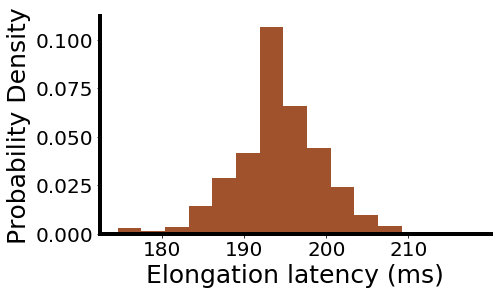

In [34]:
from Bio import SeqIO
from Bio.Seq import Seq
import pandas as pd
from collections import Counter
import numpy as np



codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_latency = compute_gene_elongt(codon_elongt)
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_latency)

print('elongt ',np.average(transcriptome_elongt))


#Plot the elongation latency of each gene
fig,ax = plt.subplots(figsize=(7,4))

hist=ax.hist(transcriptome_elongt,color='sienna',bins=15,density=True)
print(np.average(transcriptome_elongt))

ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=20)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlabel('Elongation latency (ms)',size=25)
ax.set_ylabel('Probability Density',size=25)

#2985